In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

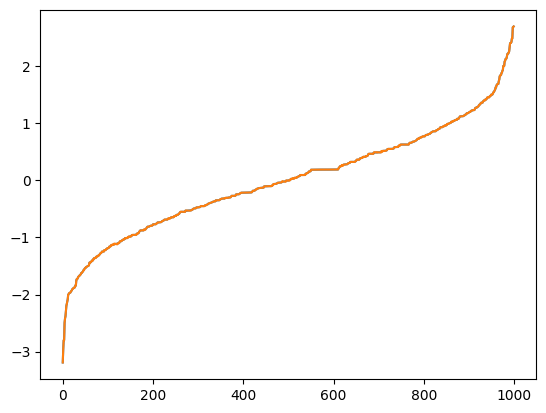

In [271]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 8
t = np.arange(0,5000,1)
K = 2.3
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 200
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))


In [240]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    
    if num == 'l':

        left_l,left_r = arg_psize[0]-1,arg_psize[0]
        cluster = np.array([peaks_new[left_l],peaks_new[left_r]])
    elif num == 'r':
        right_l,right_r = arg_psize[0]+1,arg_psize[0]+2
        cluster = np.array([peaks_new[right_l],peaks_new[right_r]])
    else:
        c_l,c_r = arg_psize[num],arg_psize[num]+1
        cluster = np.array([peaks_new[c_l],peaks_new[c_r]])
    size = np.diff(cluster)[0]
    return cluster,size

def get_cluster_near(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    
    c_l,c_r = arg_psize[0]+num,arg_psize[0]+1+num
    cluster = np.array([peaks_new[c_l],peaks_new[c_r]])
    size = np.diff(cluster)[0]
    return cluster,size



# def near_main(peaks,rl):
#     num = 0
#     peaks = peaks[np.where((peaks<N)&(peaks>1))]
#     peaks_new = [peaks[0],*peaks]
#     psize = np.diff(peaks_new)
#     arg_psize = np.argsort(psize)[::-1] 
#     left_l,left_r = arg_psize[num]-1,arg_psize[num]
#     l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]])
    
#     right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
#     r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]])
#     return l_cluster,r_cluster


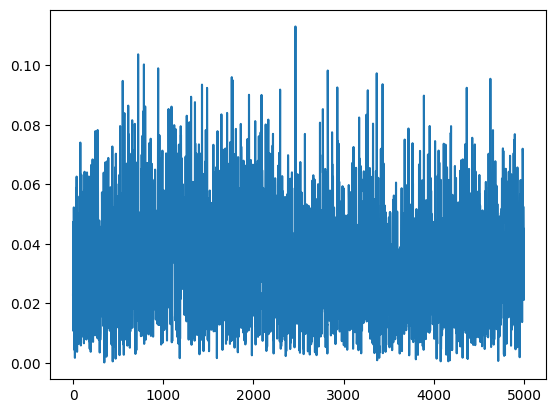

In [241]:
plt.plot(t,rs)

#### main cluster를 먼저 확인해 보고, 메인 클러스터의 근처의 피크에서 다른 클러스터 들이 나왔는지 확인한다
#### main cluster를 판별하고, 그 클러스터가 메인 클러스터 보다 큰지 혹은 작은지 확인해서 좌 우 를 분리해서 정리한다.
#### main cluster의 frame을 정리하고 그 frame을 기준으로 좌 우로 어떻게 되었는지 확인한다.
>> 시간에 대해서는 어떻게 변하는지 확인하는 것은 힘듦

In [42]:
class class_Test:
    def __init__(self,data):
        self.data = data
        print(self.data)
    def re_print(self):
        print(self.data)

In [124]:
A = class_Test('temp')

temp


In [125]:
A.__init__('asdfasF')

asdfasF


In [126]:
A.re_print()

asdfasF


## Psize를 기준으로 처음에 정렬, main cluster의 좌우를 비교

In [5]:
class cluster:
    def __init__(self,avg_dtheta=avg_dtheta,iter_time = 1000):
        self.avg_dtheta = avg_dtheta
        def to_cluster(num,arg,arg_psize):
            C = arg_psize[num],arg_psize[num]+1
            arg_C = peaks_new[C[0]],peaks_new[C[1]]
            cluster = arg[arg_C[0]:arg_C[1]]
            return cluster
        
        for index in range(-iter_time,0):
            arg = np.argsort(avg_dtheta[index])
            SD = avg_dtheta[index][arg]
            diff_dtheta = np.diff([SD[0],*SD])
            peaks, P  = find_peaks(diff_dtheta, height=0.01)
            peaks = peaks[np.where((peaks<N)&(peaks>1))]

            peaks_new = np.array([peaks[0],*peaks])
            psize = np.diff(peaks_new)
            arg_psize = np.argsort(psize)[::-1]
            if iter_time == 0:
                for i in range(10):
                    C = arg_psize[i],arg_psize[i]+1
                    arg_C = peaks_new[C[0]],peaks_new[C[1]]
                    cluster = arg[arg_C[0]:arg_C[1]]
                    if N//2 in cluster:
                        main_i = i
                        break
                    else:
                        main_i = np.nan
                    main_10 = arg_psize[:10]
                    L_cluster_idx = main_10[main_10>main_i]
                    R_cluster_idx = main_10[main_10<main_i]

            if iter_time == 1:
                for i in range(10):
                    C = arg_psize[i],arg_psize[i]+1
                    arg_C = peaks_new[C[0]],peaks_new[C[1]]
                    cluster = arg[arg_C[0]:arg_C[1]]
                    if N//2 in cluster:
                        main_i = i
                        break
                    else:
                        main_i = np.nan
                    main_10 = arg_psize[:10]
                    L_cluster_idx1 = main_10[main_10>main_i]
                    R_cluster_idx1 = main_10[main_10<main_i]

In [276]:
def Draw_vel_r(t_sum,avg_r,avg_dtheta,figsize=(6.4,2)):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=figsize)
    plt.sca(ax1),plt.plot((avg_dtheta[-1]))
    plt.xlabel('oscillator index'),plt.ylabel('avg ang. vel.')

    plt.sca(ax2),plt.plot(t_sum,avg_r),plt.ylim(0,1)
    plt.xlabel('time'),plt.ylabel('avg $r$')
    plt.tight_layout()
    plt.show()

In [278]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 2
dt = 0.1
t = np.arange(0,8000,dt)
K = 2.4
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= 0*omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
mul_dt = int(1/dt)
sum_time = 200*mul_dt
t_sum = t[sum_time:]
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
avg_r = (rs[sum_time:]-rs[:-sum_time])/sum_time

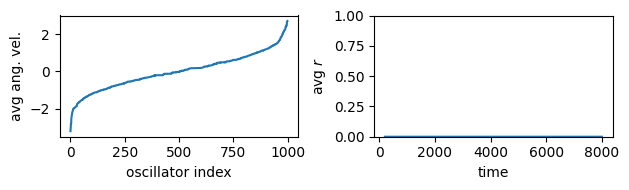

In [277]:
Draw_vel_r(t_sum,avg_r,avg_dtheta)

In [174]:
rs_s = {}
avg_dtheta_s = {}
num_ = 0

In [279]:
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
diff_dtheta = np.diff([SD[0],*SD])
peaks, P  = find_peaks(diff_dtheta, height=0.01)
peaks = peaks[np.where((peaks<N)&(peaks>1))]
try:
    peaks_new = np.array([peaks[0],*peaks])
except IndexError:
    peaks_new = np.array([0,N])

psize = np.diff(peaks_new)
arg_psize = np.argsort(psize)[::-1]
sort_psize = np.sort(psize)[::-1]

In [280]:
psize

array([ 0,  3,  3,  2,  2,  4,  3,  2,  2,  3,  2,  4,  3,  2,  2,  3,  2,
        2,  2,  9,  3,  6,  6,  2,  2,  5,  3,  6,  4,  3,  4, 19,  4,  5,
        5,  2, 15, 12,  5, 15,  2, 13,  9, 11,  5, 22, 10,  2,  2, 12, 10,
       18, 17, 23, 32, 11, 43,  4, 34,  2,  6, 15, 14,  3,  6, 12,  4, 14,
        6, 65,  5, 14,  4,  2, 22,  7, 11, 36,  5, 16, 10,  5, 17, 19,  5,
       12, 12,  3, 10,  5,  4, 15, 10,  4,  4,  5,  5,  9,  7,  6,  4,  9,
        4,  4,  4,  6,  7,  2,  8,  3,  2,  2,  3,  2,  5,  2,  4,  2,  2,
        3,  2,  4,  3,  2,  3,  2,  2])

In [230]:
def to_cluster(idx,peaks_new,arg):
    C = idx,idx+1
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = arg[arg_C[0]:arg_C[1]]
    return cluster
iter_time = 200*()
num = 0
for index in range(-iter_time,0):
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    try:
        peaks_new = np.array([peaks[0],*peaks])
    except IndexError:
        peaks_new = np.array([0,N])

    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1]
    sort_psize = np.sort(psize)[::-1]
    if num==0:
        psize_array = sort_psize[:20]
        num+=1
    else:
        psize_array = np.c_[psize_array,sort_psize[:20]]
Is_group = np.where((np.std(psize_array,axis=1) == 0))#&(psize_array[:,-1]>10))
print(Is_group)
L_cluster = {}
R_cluster = {}
M_cluster = []

num = 0
L_cluster_sort = {}
R_cluster_sort = {}
M_cluster_sort = []
if len(Is_group[0]) !=0:
    for index in range(-iter_time,0):
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        peaks = peaks[np.where((peaks<N)&(peaks>1))]

        try:
            peaks_new = np.array([peaks[0],*peaks])
        except IndexError:
            peaks_new = np.array([0,N])
        psize = np.diff(peaks_new)
        arg_psize = np.argsort(psize)[::-1]

        if -iter_time == index:
            sort_psize = np.sort(psize)[::-1]
            
            IS_main = []
            for i in range(20):
                C = arg_psize[i],arg_psize[i]+1
                arg_C = peaks_new[C[0]],peaks_new[C[1]]
                cluster = arg[arg_C[0]:arg_C[1]]
                if (N//2 in cluster)&(num==0):
                    main_i = i
                    num+=1
                IS_main.append(np.mean(abs(cluster -N//2)))
            main_i = np.argmin(IS_main)
            main_10 = arg_psize[:20][Is_group]
            
            M_cluster_idx = main_10[main_i]
            L_cluster_idx = main_10[main_10<main_10[main_i]]
            L_cluster_g = Is_group[0][main_10<main_10[main_i]]
            R_cluster_idx = main_10[main_10>main_10[main_i]]
            R_cluster_g = Is_group[0][main_10>main_10[main_i]]
            # for i in range(20):
            #     C = arg_psize[i],arg_psize[i]+1
            #     arg_C = peaks_new[C[0]],peaks_new[C[1]]
            #     cluster = arg[arg_C[0]:arg_C[1]]
            #     if (N//2 in cluster)&(num==0):
            #         main_i = i
            #         num+=1
            #     main_10 = arg_psize[:20][Is_group]
                
            #     M_cluster_idx = main_10[main_i]
            #     L_cluster_idx = main_10[main_10<main_10[main_i]]
            #     L_cluster_g = Is_group[0][main_10<main_10[main_i]]
            #     R_cluster_idx = main_10[main_10>main_10[main_i]]
            #     R_cluster_g = Is_group[0][main_10>main_10[main_i]]
            #     print(M_cluster_idx,len(to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)))
            
            for i,idx in enumerate(L_cluster_idx):
                L_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                L_cluster[i] = L_c
                print('L',i,idx,len(L_c),psize[idx])
            for i,idx in enumerate(R_cluster_idx):
                R_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                R_cluster[i] = R_c
                print('R',i,idx,len(R_c),psize[idx])
            M_cluster = to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)
            print("M",len(M_cluster))
            # break
        else:
            main_10 = arg_psize[:20][Is_group]
            M_cluster_idx = main_10[main_i]
            L_cluster_idx = arg_psize[:20][L_cluster_g]
            R_cluster_idx = arg_psize[:20][R_cluster_g]
            M_cluster = np.c_[M_cluster,to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)]

            for i,Lidx in enumerate(L_cluster_idx):
                try:
                    L_cluster[i] = np.c_[L_cluster[i],to_cluster(Lidx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(L_cluster[i].shape,len(to_cluster(Lidx,peaks_new=peaks_new,arg=arg)))

            for i,Ridx in enumerate(R_cluster_idx):
                try:
                    R_cluster[i] = np.c_[R_cluster[i],to_cluster(Ridx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(R_cluster[i].shape,len(to_cluster(Ridx,peaks_new=peaks_new,arg=arg)))
                    # break
# if len(Is_group[0]) !=0:

#     M_cluster_sort = M_cluster[-1]
#     for i,idx in enumerate(R_cluster_idx):
#         std_cluster =  np.mean(np.std(np.sort(R_cluster[i],axis=0),axis=1))
#         print(std_cluster,end='|')
#         if std_cluster != 0 :
#             del R_cluster[i]
#             # np.delete(R_cluster_idx.pop(i)
#         else:
#             R_cluster_sort[i] = R_cluster[i][-1]
#     for i,idx in enumerate(L_cluster_idx):
#         std_cluster =  np.mean(np.std(np.sort(L_cluster[i],axis=0),axis=1))
#         print(std_cluster,end='|')
#         if std_cluster != 0 :
#             del L_cluster[i]
#             # L_cluster_idx.pop(i)
#         else:
#             L_cluster_sort[i] = L_cluster[i][-1]

(array([], dtype=int64),)


In [231]:
if len(Is_group[0]) !=0:

    M_cluster_sort = M_cluster[-1]
    for i,idx in enumerate(R_cluster_idx):
        std_cluster =  np.mean(np.std(np.sort(R_cluster[i],axis=0),axis=1))
        print(std_cluster,end='|')
        if std_cluster != 0 :
            del R_cluster[i]
            # np.delete(R_cluster_idx.pop(i)
        else:
            R_cluster_sort[i] = R_cluster[i][-1]
    for i,idx in enumerate(L_cluster_idx):
        std_cluster =  np.mean(np.std(np.sort(L_cluster[i],axis=0),axis=1))
        print(std_cluster,end='|')
        if std_cluster != 0 :
            del L_cluster[i]
            # L_cluster_idx.pop(i)
        else:
            L_cluster_sort[i] = L_cluster[i][-1]

In [232]:
M_cluster

[]

In [233]:
for i,idx in enumerate(R_cluster_idx):
        std_cluster =  np.mean(np.std(np.sort(R_cluster[i],axis=0),axis=1))
        print(std_cluster,end='|')
        if std_cluster != 0 :
            del R_cluster[i]
            # np.delete(R_cluster_idx.pop(i)
        else:
            R_cluster_sort[i] = R_cluster[i][-1]

KeyError: 0

In [124]:
L_cluster

{0: array([[261, 261, 261, ..., 261, 261, 261],
        [262, 262, 262, ..., 262, 262, 262],
        [263, 263, 263, ..., 263, 263, 263],
        ...,
        [316, 316, 316, ..., 316, 316, 316],
        [317, 317, 317, ..., 317, 317, 317],
        [318, 318, 318, ..., 318, 318, 318]])}

In [18]:
R_cluster.keys()

dict_keys([0, 1])

TypeError: list indices must be integers or slices, not tuple

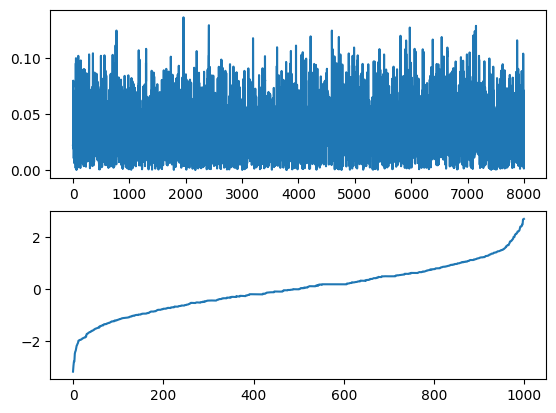

In [234]:
plt.subplot(211)
plt.plot(t,rs)
plt.subplot(212)
plt.plot(avg_dtheta[-1])
plt.plot(np.sort(M_cluster[:,-1]),avg_dtheta[-1][M_cluster[:,-1]])
for i,idx in enumerate(R_cluster.keys()):
    plt.plot(R_cluster[i][:,-1],avg_dtheta[-1][R_cluster[i][:,-1]])
for i,idx in enumerate(L_cluster.keys()):
    plt.plot(L_cluster[i][:,-1],avg_dtheta[-1][L_cluster[i][:,-1]])




Text(0, 0.5, '$\\mathcal{l}_{0.2}$')

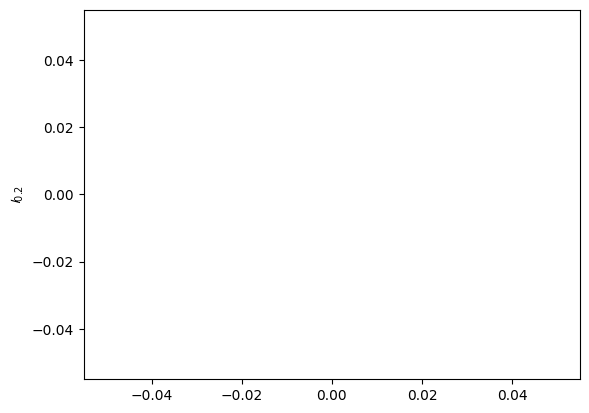

In [223]:
plt.plot()
plt.ylabel(r'$\mathcal{l}_{0.2}$')

In [228]:
arg_psize

array([15, 14, 16,  8, 13, 17,  5, 10, 26, 18, 19,  3,  4, 22,  2,  6,  7,
       23,  9, 25, 20, 11, 12, 24, 21,  1,  0], dtype=int64)

In [62]:
psize_array.std(axis=1)


array([7.68134754e+01, 7.02562275e+00, 1.21777461e+01, 1.87349940e+00,
       3.74699880e+00, 4.37786601e+01, 4.49701012e+00, 9.25226459e-01,
       5.15145610e-01, 6.39496677e-01, 5.59038460e-01, 3.34089808e-01,
       2.24033480e-01, 2.05095100e-01, 4.75693178e-01, 4.29492724e-01,
       2.22027025e-01, 5.46900357e-02, 6.31189354e-02, 3.02648311e-01])

In [61]:
psize_array.mean(axis=1)

array([285.7  , 153.875, 131.45 , 120.3  , 113.6  ,  47.911,  11.33 ,
         7.366,   6.525,   5.862,   5.426,   5.128,   5.053,   4.956,
         4.654,   4.244,   4.052,   4.003,   3.996,   3.898])

In [79]:
psize_array.max(axis=1) - psize_array.min(axis=1) 


array([22, 29, 20, 14, 13,  8,  8,  8,  8,  9,  6,  5,  5,  5,  5,  4,  4,
        4,  3,  2])

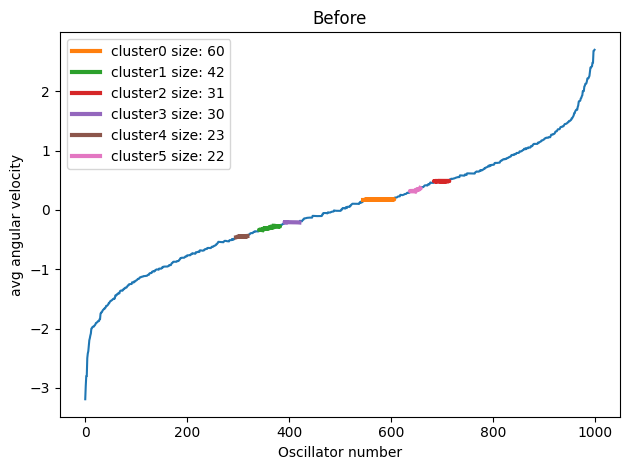

In [235]:
main_10 = arg_psize[:10]
plt.plot(avg_dtheta[-1])
for i,idx in enumerate(arg_psize[:10][:6]):
    cluster = to_cluster(idx,peaks_new=peaks_new,arg=arg)
    plt.plot(cluster,avg_dtheta[-1][cluster],lw=3,label = f'cluster{i} size: {len(cluster)}')

plt.title('Before')
plt.xlabel('Oscillator number')
plt.ylabel('avg angular velocity')
plt.legend()
plt.tight_layout()

In [236]:
avg_dtheta[]

SyntaxError: invalid syntax (1721506269.py, line 1)

In [22]:
np.mean(psize_array,axis=1)

array([339.   , 149.   , 123.   , 119.   , 111.   ,  15.662,   7.454,
         7.069,   6.321,   5.881,   5.646,   5.494,   5.243,   5.   ,
         5.   ,   5.   ,   4.976,   4.838,   4.243,   4.023])

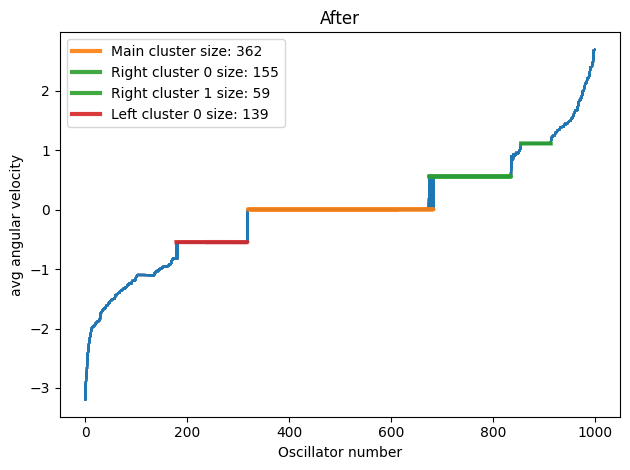

In [142]:
main_10 = arg_psize[:10]
plt.plot(avg_dtheta[-100:].T,alpha=0.1,zorder=0,color ='tab:blue')
cluster = M_cluster[:,-1]
plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:orange',lw=3,alpha=0.9,label = f'Main cluster size: {len(cluster)}',zorder=1)
for i,idx in enumerate(R_cluster.keys()):
    cluster = R_cluster[i][:,-1]
    plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:green',lw=3,alpha=0.9,label = f'Right cluster {i} size: {len(cluster)}',zorder=1)
for i,idx in enumerate(L_cluster.keys()):
    cluster = L_cluster[i][:,-1]
    plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:red',lw=3,alpha=0.9,label = f'Left cluster {i} size: {len(cluster)}',zorder=1)




plt.title('After')
plt.xlabel('Oscillator number')
plt.ylabel('avg angular velocity')
plt.legend()
plt.tight_layout()

In [ ]:
plt.subplot(211)
plt.plot(t,rs)
plt.subplot(212)
plt.plot(avg_dtheta[-1])
plt.plot(np.sort(M_cluster[:,-1]),avg_dtheta[-1][M_cluster[:,-1]])
for i,idx in enumerate(R_cluster_idx):
    plt.plot(R_cluster[i][:,-1],avg_dtheta[-1][R_cluster[i][:,-1]])
for i,idx in enumerate(L_cluster_idx):
    plt.plot(L_cluster[i][:,-1],avg_dtheta[-1][L_cluster[i][:,-1]])




In [60]:
main_10[main_10>main_10[main_i]]

array([23, 24], dtype=int64)

In [61]:
Is_group
R_cluster_idx

array([23, 24], dtype=int64)

In [62]:
np.sort(R_cluster[i],axis=0)

array([[864, 864, 864, ..., 864, 864, 864],
       [867, 867, 867, ..., 867, 867, 867],
       [868, 868, 868, ..., 868, 868, 868],
       ...,
       [953, 953, 953, ..., 953, 953, 953],
       [954, 954, 954, ..., 954, 954, 954],
       [955, 955, 955, ..., 955, 955, 955]], dtype=int64)

In [89]:
Is_group[0][main_10<main_10[main_i]]

array([1, 3], dtype=int64)

In [90]:
L_cluster_g, R_cluster_g

(array([1, 3], dtype=int64), array([2], dtype=int64))

In [91]:
(np.std(psize_array,axis=1) == 0)&(psize_array[:,-1]>10)

array([ True,  True,  True,  True, False, False, False, False, False,
       False])

In [68]:
R_cluster

{0: array([[719, 718, 717, ..., 476, 476, 788],
        [718, 717, 716, ..., 489, 788, 789],
        [720, 716, 718, ..., 503, 789, 790],
        ...,
        [683, 683, 683, ..., 785, 780, 773],
        [684, 684, 684, ..., 786, 781, 771],
        [685, 685, 685, ..., 787, 782, 772]], dtype=int64),
 1: array([[942, 939, 936, ..., 955, 955, 955],
        [941, 940, 937, ..., 954, 954, 954],
        [943, 938, 938, ..., 953, 953, 953],
        ...,
        [868, 868, 868, ..., 911, 911, 906],
        [867, 867, 867, ..., 912, 910, 905],
        [864, 864, 864, ..., 913, 909, 904]], dtype=int64)}

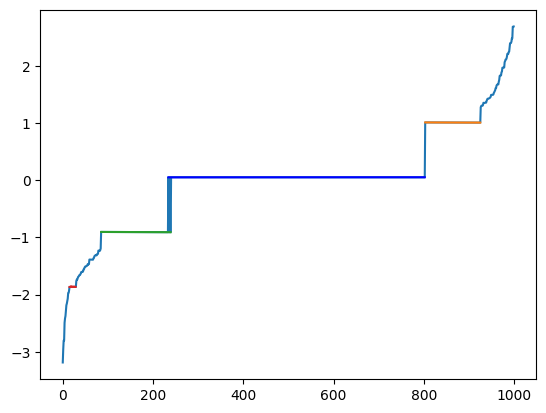

In [92]:
plt.plot(avg_dtheta[-1])
plt.plot(np.sort(M_cluster[:,-1]),avg_dtheta[-1][M_cluster[:,-1]],'b')
for i,idx in enumerate(R_cluster_idx):
    plt.plot(R_cluster[i][:,-1],avg_dtheta[-1][R_cluster[i][:,-1]])


for i,idx in enumerate(L_cluster_idx):
    plt.plot(L_cluster[i][:,-1],avg_dtheta[-1][L_cluster[i][:,-1]])



In [305]:
L_cluster_idx

array([27, 29, 12, 19])

In [294]:
L_cluster

{}

In [293]:
np.c_[M_cluster,to_cluster(main_i,arg_psize,arg)].shape


(517, 1002)

In [280]:
M_cluster.shape

(517,)

In [271]:
arg_psize[:10][Is_group],Is_group

(array([56]), (array([0]),))

In [270]:
main_10

array([55])

In [244]:
arg_psize[:10][Is_group]

array([56])

In [243]:
Is_group

(array([0]),)

In [234]:
arg_psize[:10][np.where(np.std(psize_array,axis=1) == 0)]

array([56])

In [235]:
iter_time

1000

In [236]:
main_10

NameError: name 'main_10' is not defined

In [242]:
for index in range(-iter_time,0):
    if -iter_time == index:
        print(index)

-1000


1000

In [230]:
main_i

2

In [196]:
i_ = [1]
for i in range(10):
    try:
        i_[i]
    except IndexError:
        break

In [197]:
for i in range(-10,10):
    if i == -10:
        print(i)

-10


In [192]:
def get_main_cluster(index,avg_dtheta=avg_dtheta):
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    peaks = peaks[np.where((peaks<N)&(peaks>1))]

    peaks_new = np.array([peaks[0],*peaks])
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1]
    for i in range(100):
        C = arg_psize[i],arg_psize[i]+1
        arg_C = peaks_new[C[0]],peaks_new[C[1]]
        cluster = arg[arg_C[0]:arg_C[1]]
        if N//2 in cluster:
            main_i = i
        else:
            main_i = np.nan
    return main_i
            

In [191]:
A = cluster(-1)
A.
print(A.main_i)

2


In [151]:
get_main_cluster(-1)

2

In [152]:
v_mc = np.vectorize(get_main_cluster)

In [166]:
%timeit v_mc(-10)

149 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


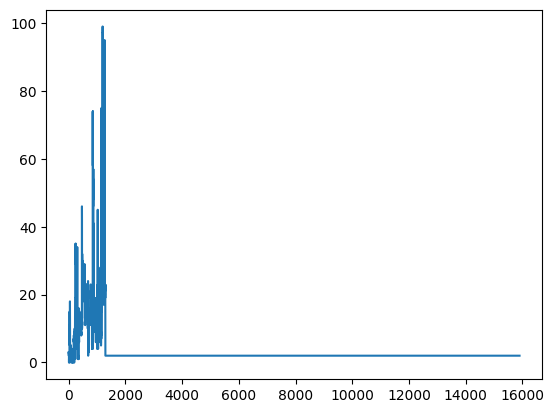

In [167]:
plt.plot(np.arange(0,len(t)-sum_time,10)*0.1,v_mc(np.arange(0,len(t)-sum_time,10)))
# plt.plot(t,rs*100)

In [124]:

for num in range(-10,10):
    C = arg_psize[main_i]+num,arg_psize[main_i]+1+num
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = arg[arg_C[0]:arg_C[1]]
    print(len(cluster))

7
5
4
8
69
12
7
3
4
204
134
184
2
12
5
8
2
13
4
18


NameError: name 'get_cluster' is not defined

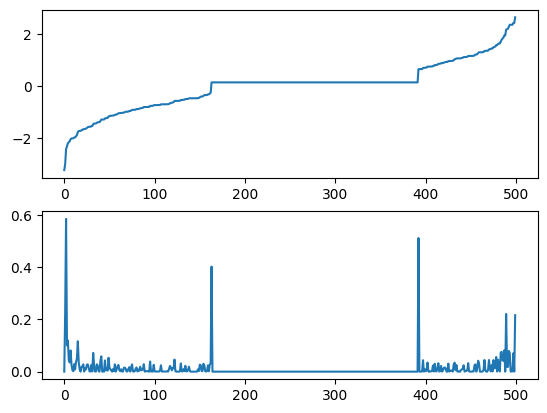

In [168]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,S_l = get_cluster(peaks,'l')
r_c,S_r = get_cluster(peaks,'r')


max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index][arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [169]:
len(t)-1000

19000

In [24]:
def Group_check(avg_dtheta, groups,iter_time):
    '''input -> dtheta, groups -> `which groups`, iter_time->simulation iter time'''
    sizes = []
    mean_dthetas = []
    std_dthetas = []
    mean_omegas = []
    std_omegas = []
    cluster_idxs = []
    for i in range(-iter_time,0):
        index = i
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        C,S = get_cluster(peaks,groups)
        sizes.append(S)
        cluster = arg[C[0]:C[1]]
        dtheta_c = SD[cluster]
        omega_c = omega[arg][cluster]
        D_mean = np.mean(dtheta_c)
        D_std = np.std(dtheta_c) 

        O_mean = np.mean(omega_c)
        O_std = np.std(omega_c) 
        mean_dthetas.append(D_mean)
        std_dthetas.append(D_std)
        cluster_idxs.append(cluster)
        mean_omegas.append(O_mean)
        std_omegas.append(O_std)
    c_mean_size = np.mean(sizes)
    d_mean = np.mean(mean_dthetas)
    d_std = np.mean(std_dthetas)
    o_mean = np.mean(mean_omegas)
    o_std = np.mean(std_omegas)

    
    std_size = np.std(sizes)
    Is_group = [std_size == 0][0]
    data = {'cluster_size' :  c_mean_size,
            'cluster_std':std_size,
            'dtheta_mean': d_mean,
            'dtheta_std' : d_std,
            'omega_mean': o_mean,
            'omega_std' : o_std,
            'Is_group': Is_group,
            'clsuter_size array': sizes,
            'mean_dtheta array': mean_dthetas,
            'std_dtheta array': std_dthetas,
            'mean_omega array': mean_omegas,
            'std_omega array': std_omegas,
            'cluster_indexs array': cluster_idxs,
    }
    return data


def Group_check_near(avg_dtheta, groups,iter_time):
    '''input -> dtheta, groups -> `which groups`, iter_time->simulation iter time'''
    sizes = []
    mean_dthetas = []
    std_dthetas = []
    mean_omegas = []
    std_omegas = []
    cluster_idxs = []
    for i in range(-iter_time,0):
        index = i
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        C,S = get_cluster_near(peaks,groups)
        sizes.append(S)
        cluster = arg[C[0]:C[1]]
        dtheta_c = SD[cluster]
        omega_c = omega[arg][cluster]
        D_mean = np.mean(dtheta_c)
        D_std = np.std(dtheta_c) 

        O_mean = np.mean(omega_c)
        O_std = np.std(omega_c) 
        mean_dthetas.append(D_mean)
        std_dthetas.append(D_std)
        cluster_idxs.append(cluster)
        mean_omegas.append(O_mean)
        std_omegas.append(O_std)
    c_mean_size = np.mean(sizes)
    d_mean = np.mean(mean_dthetas)
    d_std = np.mean(std_dthetas)
    o_mean = np.mean(mean_omegas)
    o_std = np.mean(std_omegas)

    
    std_size = np.std(sizes)
    Is_group = [std_size == 0][0]
    data = {'cluster_size' :  c_mean_size,
            'cluster_std':std_size,
            'dtheta_mean': d_mean,
            'dtheta_std' : d_std,
            'omega_mean': o_mean,
            'omega_std' : o_std,
            'Is_group': Is_group,
            'clsuter_size array': sizes,
            'mean_dtheta array': mean_dthetas,
            'std_dtheta array': std_dthetas,
            'mean_omega array': mean_omegas,
            'std_omega array': std_omegas,
            'cluster_indexs array': cluster_idxs,
    }
    return data

In [78]:
seed =11
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 20
t = np.arange(0,16000,0.1)
K = 3.4
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 1000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

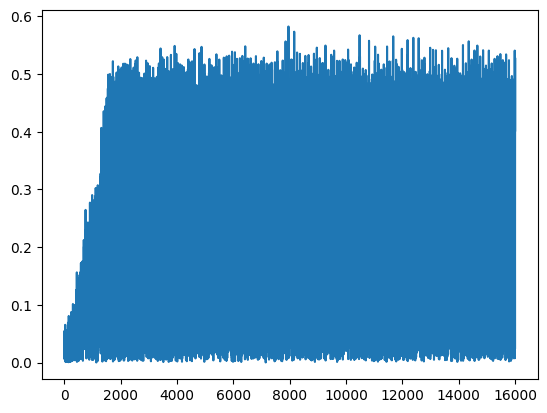

In [79]:
plt.plot(t,rs) 

In [80]:
G0 = Group_check(avg_dtheta,0,1000)
G1 = Group_check(avg_dtheta,1,1000)
G2 = Group_check(avg_dtheta,2,1000)
G3 = Group_check(avg_dtheta,3,1000)
G4 = Group_check(avg_dtheta,4,1000)
Gl = Group_check(avg_dtheta,'l',1000)
Gr = Group_check(avg_dtheta,'r',1000)

In [81]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K,m=K : K*r

In [82]:
o_p = omega_p(np.mean(rs[-1000]),K,m)
o_d = omega_d(np.mean(rs[-1000]),K,m)

In [87]:
N//2

500

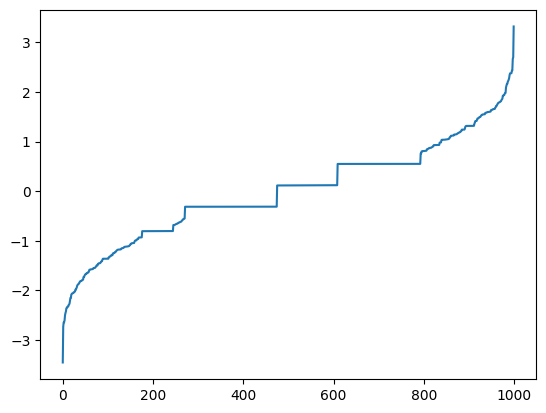

In [83]:
arg = np.argsort(avg_dtheta[-1])
plt.plot(avg_dtheta[-1][arg])

In [84]:
Group_check_near(avg_dtheta, -3,1000)

{'cluster_size': 8.876,
 'cluster_std': 5.5900468692131735,
 'dtheta_mean': -0.6342683290484282,
 'dtheta_std': 0.023097160354905406,
 'omega_mean': -0.647250415127731,
 'omega_std': 0.013293848619547176,
 'Is_group': False,
 'clsuter_size array': [7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  19,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
 

In [85]:
Gn = lambda x: Group_check_near(avg_dtheta, x,1000)

In [86]:
Keys = G0.keys()
print(Keys)
for check_ in Keys:
    if 'array' not in check_:
        print('#####'*10)
        print(f'{check_} : G0 G1 G2 G3 Gl Gr\n',G0[check_], G1[check_],G2[check_],G3[check_],G4[check_])
        print(f'{check_} :Gl G0 Gr\n',Gl[check_],G0[check_],Gr[check_])
        print(f'{check_} :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3\n',Gn(-3)[check_],Gn(-2)[check_],Gn(-1)[check_],Gn(0)[check_],Gn(1)[check_],Gn(2)[check_],Gn(3)[check_])


dict_keys(['cluster_size', 'cluster_std', 'dtheta_mean', 'dtheta_std', 'omega_mean', 'omega_std', 'Is_group', 'clsuter_size array', 'mean_dtheta array', 'std_dtheta array', 'mean_omega array', 'std_omega array', 'cluster_indexs array'])
##################################################
cluster_size : G0 G1 G2 G3 Gl Gr
 204.0 184.0 134.0 69.0 20.61
cluster_size :Gl G0 Gr
 3.601 204.0 134.0
cluster_size :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3
 8.876 5.597 3.601 204.0 134.0 184.0 2.0
##################################################
cluster_std : G0 G1 G2 G3 Gl Gr
 0.0 0.0 0.0 0.0 0.9507365565707464
cluster_std :Gl G0 Gr
 1.1134626172440636 0.0 0.0
cluster_std :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3
 5.5900468692131735 6.562209307847471 1.1134626172440636 0.0 0.0 0.0 0.0
##################################################
dtheta_mean : G0 G1 G2 G3 Gl Gr
 -0.3039501203599222 0.5453620829708525 0.11237222863147132 -0.8041959462528683 0.8567182778059038
dtheta_mean :Gl G0 Gr
 -0.5696893420190147 

In [20]:
np.std(Sizes)

0.0

In [ ]:
cm,cl,cr = [], [],[]
Om,Ol,Or = [], [],[]
Sm,Sl,Sr = [], [],[]


c1,c2 = [], []
O1,O2 = [], []
S1,S2 = [], []

for i in range(len(t)-sum_time-1000,len(t)-sum_time):
    index = i
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    C_0,S_0 = get_cluster(peaks,0)
    C_1,S_1 = get_cluster(peaks,1)
    C_2,S_2 = get_cluster(peaks,2)
    l_c,r_c = near_main(peaks)
    cluster_0 = arg[C_0[0]:C_0[1]]
    cluster_1 = arg[C_1[0]:C_1[1]]
    cluster_2 = arg[C_2[0]:C_2[1]]
    cluster_l = arg[l_c[0]:l_c[1]]
    cluster_r = arg[r_c[0]:r_c[1]]
    O_m = np.mean(avg_dtheta[index][cluster_0])
    O_1 = np.mean(avg_dtheta[index][cluster_1])
    O_2 = np.mean(avg_dtheta[index][cluster_2])
    O_l = np.mean(avg_dtheta[index][cluster_l])
    O_r = np.mean(avg_dtheta[index][cluster_r])
    std_m = np.std(avg_dtheta[index][cluster_0])
    std_l = np.std(avg_dtheta[index][cluster_l])
    std_r = np.std(avg_dtheta[index][cluster_r])
    std_1 = np.std(avg_dtheta[index][cluster_1])
    std_2 = np.std(avg_dtheta[index][cluster_2])
    
    cm.append(len(cluster_0))
    c1.append(len(cluster_1))
    c2.append(len(cluster_2))
    cl.append(len(cluster_l))
    cr.append(len(cluster_r))
    Om.append(O_m)
    O1.append(O_1)
    O2.append(O_2)
    Ol.append(O_l)
    Or.append(O_r)
    
    Sm.append(std_m)
    S1.append(std_1)
    S2.append(std_2)
    Sl.append(std_l)
    Sr.append(std_r)

In [155]:
np.std(cm),np.std(cl),np.std(cr),np.std(c1),np.std(c2)

(0.0, 0.0, 0.0, 0.0, 0.0)

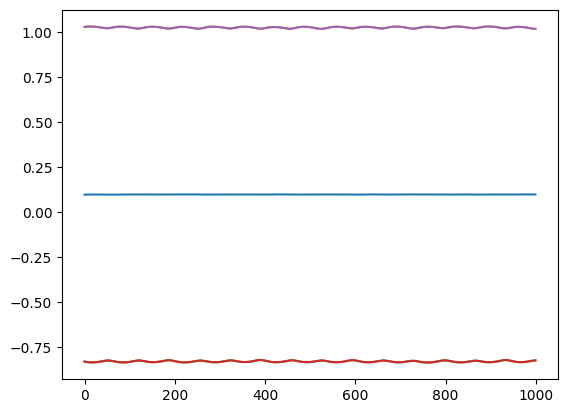

In [156]:
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])


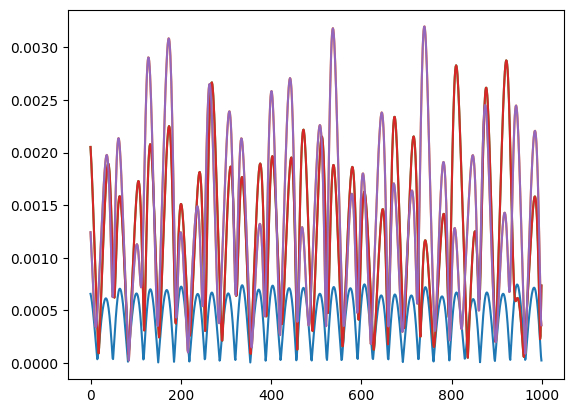

In [157]:
plt.plot(Sm)
plt.plot(Sr)
plt.plot(Sl)
plt.plot(S1)
plt.plot(S2)

In [148]:
# cluster를 확인해 볼때, 양옆의 클러스터가 계속적으로 유지되어야 의미가 있기 때문에
# 개수가 변하면은 클러스터가 없다고 생각하고 0으로 바꾸는 코드로 수정을 해야 할듯

In [309]:
dm = 'dtheta_mean'
G0[dm] - G2[dm],G0[dm] - G1[dm]

(0.5694362312787102, -0.5605413676035452)

# Cluster check ver 2

In [5]:
def Draw_vel_r(t,avg_r,avg_dtheta,r,sum_time,figsize=(6.4*1.5,2)):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=figsize)
    plt.sca(ax1),plt.plot((avg_dtheta[-1]))
    plt.xlabel('oscillator index'),plt.ylabel('avg ang. vel.')

    plt.sca(ax2),plt.plot(t[sum_time:],avg_r),plt.ylim(0,1)
    plt.xlabel('time'),plt.ylabel('avg $r$')
    plt.tight_layout()

    plt.sca(ax3),plt.plot(t,r),plt.ylim(0,1)
    plt.xlabel('time'),plt.ylabel('$r$')
    plt.tight_layout()
    plt.show()

In [115]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,10000,dt)
K = 2.21
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= 0*omega,p_omega=omega)

In [116]:
dtheta_c = np.cumsum(dtheta,axis=0)
mul_dt = int(1/dt)
sum_time = 200*mul_dt
t_sum = t[sum_time:]
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
rs_c = np.cumsum(rs)
avg_r = (rs_c[sum_time:]-rs_c[:-sum_time])/sum_time

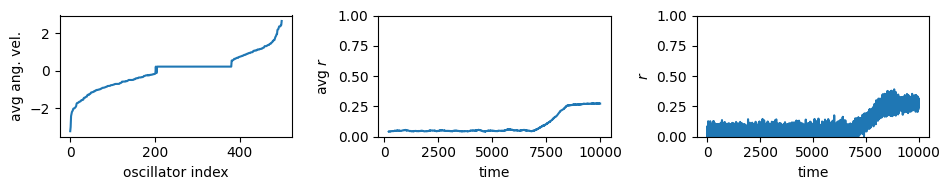

In [117]:
Draw_vel_r(t,avg_r,avg_dtheta,rs,sum_time)

In [118]:
def to_cluster(idx,peaks_new,arg):
    C = idx,idx+1
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = arg[arg_C[0]:arg_C[1]]
    return cluster
def to_cluster_barg(idx,peaks_new):
    C = idx,idx+1
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = np.arange(arg_C[0],arg_C[1])
    return cluster

iter_time = 200*5
num = 0
for index in range(-iter_time,0):
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    try:
        peaks_new = np.array([peaks[0],*peaks])
    except IndexError:
        peaks_new = np.array([0,N])

    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1]
    sort_psize = np.sort(psize)[::-1]
    c_stability = np.array([np.mean(diff_dtheta[to_cluster_barg(arg_psize[i],peaks_new)[1:]]) for i in range(10)])

    if num==0:
        psize_array = sort_psize[:10]
        c_stability_array = c_stability
        num+=1
    else:
        psize_array = np.c_[psize_array,sort_psize[:10]]
        c_stability_array = np.c_[c_stability_array,c_stability]


Is_group = np.where((np.std(psize_array,axis=1) == 0))#&(psize_array[:,-1]>10))
mean_group_s = np.mean(c_stability_array,axis=1)
Is_group_s = np.where((mean_group_s<1e-4))#&(psize_array[:,-1]>10))

In [119]:
Is_group,Is_group_s

((array([0]),), (array([0]),))

In [32]:

print(Is_group)
L_cluster = {}
R_cluster = {}
M_cluster = []

num = 0
L_cluster_sort = {}
R_cluster_sort = {}
M_cluster_sort = []
if len(Is_group[0]) !=0:
    for index in range(-iter_time,0):
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        peaks = peaks[np.where((peaks<N)&(peaks>1))]

        try:
            peaks_new = np.array([peaks[0],*peaks])
        except IndexError:
            peaks_new = np.array([0,N])
        psize = np.diff(peaks_new)
        arg_psize = np.argsort(psize)[::-1]

        if -iter_time == index:
            sort_psize = np.sort(psize)[::-1]
            
            IS_main = []
            for i in range(10):
                C = arg_psize[i],arg_psize[i]+1
                arg_C = peaks_new[C[0]],peaks_new[C[1]]
                cluster = arg[arg_C[0]:arg_C[1]]
                if (N//2 in cluster)&(num==0):
                    main_i = i
                    num+=1
                IS_main.append(np.mean(abs(cluster -N//2)))
            main_i = np.argmin(IS_main)
            main_10 = arg_psize[:10][Is_group]
            
            M_cluster_idx = main_10[main_i]
            L_cluster_idx = main_10[main_10<main_10[main_i]]
            L_cluster_g = Is_group[0][main_10<main_10[main_i]]
            R_cluster_idx = main_10[main_10>main_10[main_i]]
            R_cluster_g = Is_group[0][main_10>main_10[main_i]]
            for i,idx in enumerate(L_cluster_idx):
                L_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                L_cluster[i] = L_c
                print('L',i,idx,len(L_c),psize[idx])
            for i,idx in enumerate(R_cluster_idx):
                R_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                R_cluster[i] = R_c
                print('R',i,idx,len(R_c),psize[idx])
            M_cluster = to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)
            print("M",len(M_cluster))
            # break
        else:
            main_10 = arg_psize[:10][Is_group]
            M_cluster_idx = main_10[main_i]
            L_cluster_idx = arg_psize[:10][L_cluster_g]
            R_cluster_idx = arg_psize[:10][R_cluster_g]
            M_cluster = np.c_[M_cluster,to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)]

            for i,Lidx in enumerate(L_cluster_idx):
                try:
                    L_cluster[i] = np.c_[L_cluster[i],to_cluster(Lidx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(L_cluster[i].shape,len(to_cluster(Lidx,peaks_new=peaks_new,arg=arg)))

            for i,Ridx in enumerate(R_cluster_idx):
                try:
                    R_cluster[i] = np.c_[R_cluster[i],to_cluster(Ridx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(R_cluster[i].shape,len(to_cluster(Ridx,peaks_new=peaks_new,arg=arg)))
                    # break

(array([0, 1, 2, 3, 5]),)
L 0 10 56 56
L 1 3 8 8
L 2 4 5 5
R 0 12 53 53
M 320


In [33]:
arg_s = np.argsort(avg_dtheta[-100:],axis=1)

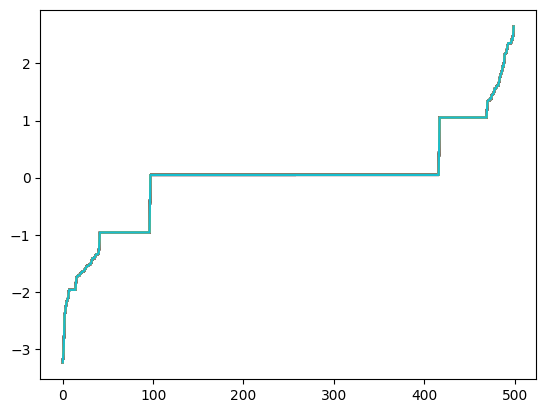

In [34]:
for i in range(-100,0):
    plt.plot(avg_dtheta[i,arg_s[i]])

In [18]:
sort_psize
to_cluster_x = lambda x: to_cluster(x,peaks_new=peaks_new,arg=arg)
to_cluster_bargx = lambda x: to_cluster_barg(x,peaks_new=peaks_new)
to_main_V = lambda x: np.mean(avg_dtheta[-1][x])
# print(timeit.timeit("list(map(to_cluster_x,sort_psize))",number=2000,globals=globals()))
A = list(map(to_cluster_x,arg_psize[:10]))


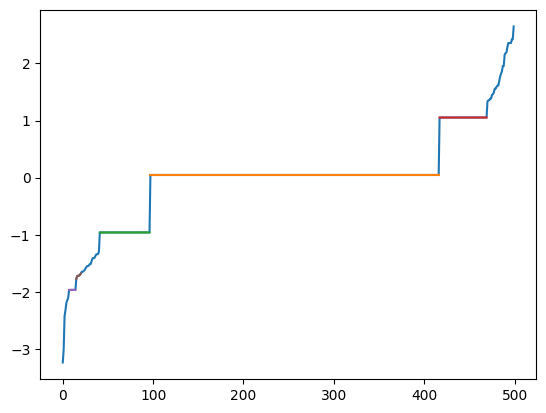

In [35]:
plt.plot(avg_dtheta[-1][arg])
for i in range(5):
    # i = 0
    plt.plot(to_cluster_bargx(arg_psize[i])[:],avg_dtheta[-1][arg][to_cluster_bargx(arg_psize[i])[:]])

In [164]:
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
diff_dtheta = np.diff([SD[0],*SD])
peaks, P  = find_peaks(diff_dtheta, height=0.01)
peaks = peaks[np.where((peaks<N)&(peaks>1))]
try:
    peaks_new = np.array([peaks[0],*peaks])
except IndexError:
    peaks_new = np.array([0,N])

psize = np.diff(peaks_new)
arg_psize = np.argsort(psize)[::-1]
sort_psize = np.sort(psize)[::-1]

In [76]:
import timeit
print(timeit.timeit("list(map(to_cluster_x,arg_psize))",number=2000,globals=globals()));
print(timeit.timeit("list(map(to_main_V,A))",number=2000,globals=globals()));

# sort_psize;

0.01699999999254942
0.044776582974009216


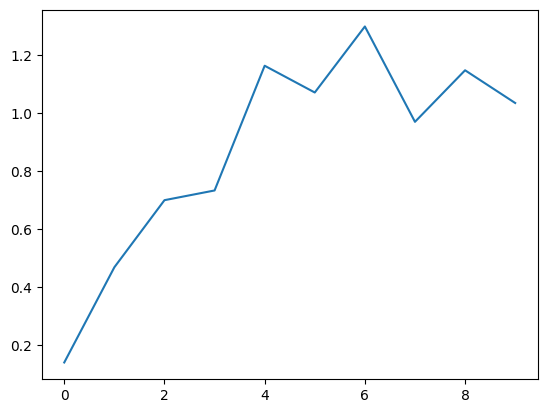

In [167]:
plt.plot(np.abs(np.array(list(map(to_main_V,A)))),'-');

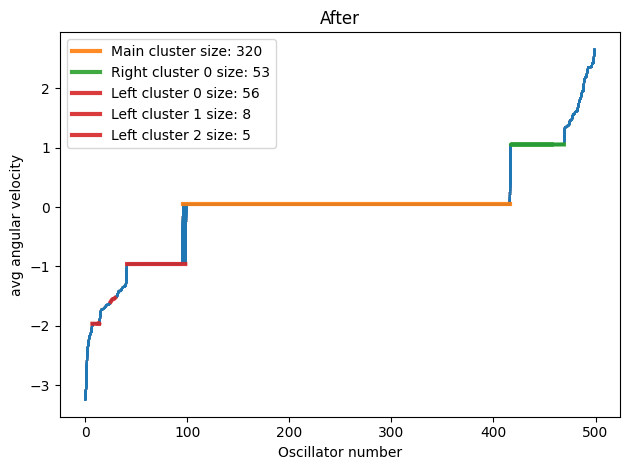

In [73]:
main_10 = arg_psize[:10]
plt.plot(avg_dtheta[-100:].T,alpha=0.1,zorder=0,color ='tab:blue')
cluster = M_cluster[:,-1]
plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:orange',lw=3,alpha=0.9,label = f'Main cluster size: {len(cluster)}',zorder=1)
for i,idx in enumerate(R_cluster.keys()):
    cluster = R_cluster[i][:,-1]
    plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:green',lw=3,alpha=0.9,label = f'Right cluster {i} size: {len(cluster)}',zorder=1)
for i,idx in enumerate(L_cluster.keys()):
    cluster = L_cluster[i][:,-1]
    plt.plot(cluster,avg_dtheta[-1][cluster],color = 'tab:red',lw=3,alpha=0.9,label = f'Left cluster {i} size: {len(cluster)}',zorder=1)




plt.title('After')
plt.xlabel('Oscillator number')
plt.ylabel('avg angular velocity')
plt.legend()
plt.tight_layout()